In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
import plotly.express as px

In [10]:
# Load your CSV data
data = pd.read_csv('data/data.csv')
data

,Year,Anomaly
0,1850,0.00
1,1851,0.10
2,1852,0.13
3,1853,0.02
4,1854,-0.06
...,...,...
170,2020,0.90
171,2021,0.88
172,2022,0.92
173,2023,1.26


In [11]:
# Extract Year and Anomaly from the data
Year = data['Year']
Anomaly = data['Anomaly']

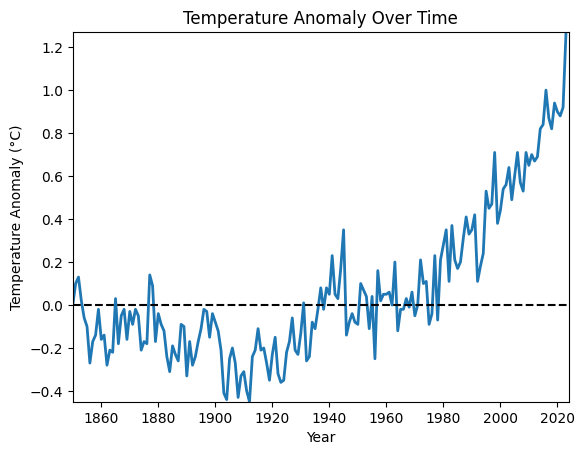

In [13]:
# Create the figure and the line that we will update
fig, ax = plt.subplots()
ax.set_xlim(min(Year), max(Year))
ax.set_ylim(min(Anomaly), max(Anomaly))

# Create the line to be animated
line, = ax.plot([], [], lw=2)

# Add the horizontal midline at 0°C
ax.axhline(0, color='black', linewidth=1.5, linestyle='--')

# Title and Labels
ax.set_title('Temperature Anomaly Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Anomaly (°C)')

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function: this is called sequentially
def animate(i):
    x = Year[:i]
    y = Anomaly[:i]
    line.set_data(x, y)
    return line,

# Create animation
ani = FuncAnimation(fig, animate, init_func=init, frames=len(Year), interval=200, blit=True)

# Define FFMpegWriter to save as MP4
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('images/temperature_anomaly_animation_with_midline.mp4', writer=writer)

plt.show()